In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import image
%matplotlib inline

import os


## **Load Data**

In [50]:
df = pd.read_csv("../input/dog-breed-identification/labels.csv")
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [51]:
# path of the dogs images
img_file='/kaggle/input/dog-breed-identification/train/'

label=df.assign(img_path=lambda x: img_file + x['id'] +'.jpg')
print(label.shape)

(10222, 3)


In [52]:
label.img_path.head(1)

0    /kaggle/input/dog-breed-identification/train/0...
Name: img_path, dtype: object

### **Visualize data distribution**

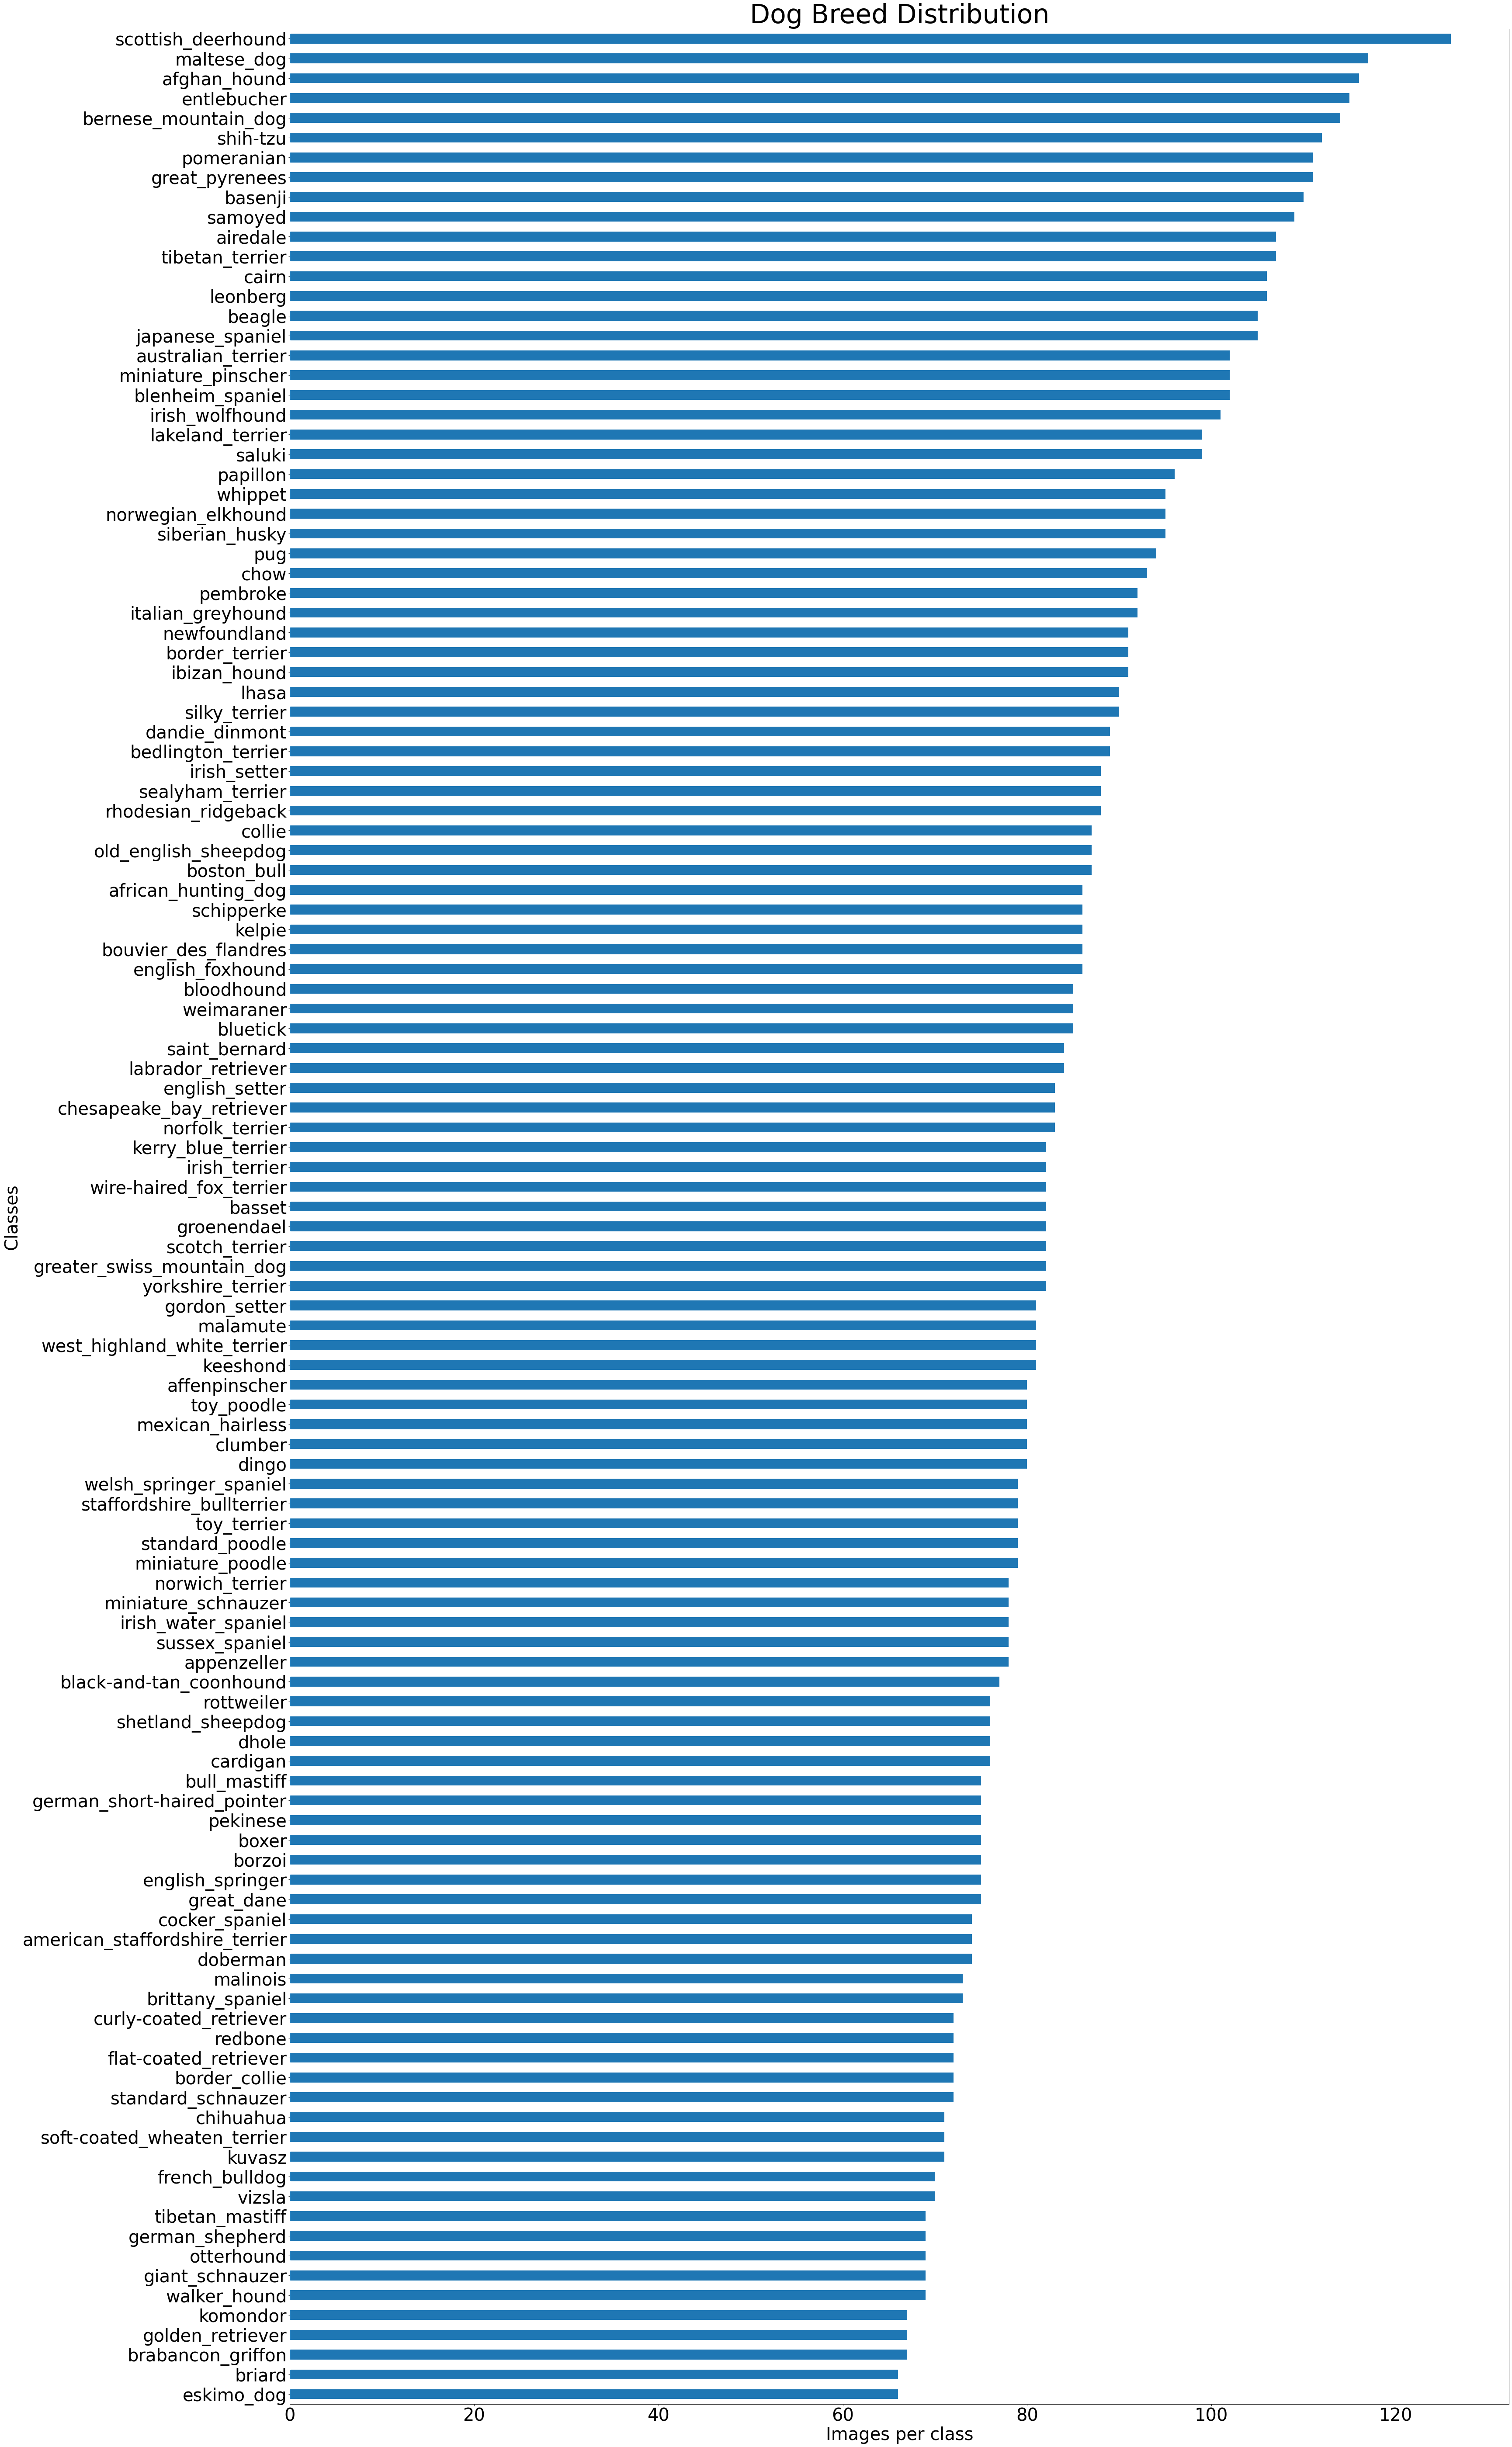

In [53]:
ax=pd.value_counts(label['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Dog Breed Distribution",
                                                       figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)

## **Prepare data**

In [54]:
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator

X=np.array([img_to_array(load_img(img, target_size=(96, 96))) for img in label['img_path'].values.tolist()])
X.shape

(10222, 96, 96, 3)

In [55]:
X.shape

(10222, 96, 96, 3)

#### Label encoder

In [56]:
Y = pd.get_dummies(df['breed'])
Y.shape

(10222, 120)

In [57]:
Y.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Build a model**

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8177, 96, 96, 3) (8177, 120)
(2045, 96, 96, 3) (2045, 120)


In [59]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,Flatten,MaxPool2D,Dropout

### The Keras Conv2D class constructor has the following arguments:
* **filters**
It is an integer value and also determines the number of output filters in the convolution.
* **kernel_size**
An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions. Common dimensions include 3x3 which can be passed as (3,3) tuples.

* **padding**
padding can take 2 values: ‘valid’ or ‘same’.
Setting the value to ‘valid’ parameter means that the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution.
Setting the value to ‘same’ parameter preserves the spatial dimensions of the volume such that the output size matches the input volume size.

* **data_format**
The parameter can be set to “channels_last” or “channels_first” value.

* **activation**
The activation parameter to the Conv2D class is simply a convenience parameter which allows you to supply a string, which specifies the name of the activation function you want to apply after performing convolution. If you don’t specify anything, no activation is applied.


In [60]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(96,96,3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))

# model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(8,(3,3)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(Y.shape[1]))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 94, 94, 64)        1792      
_________________________________________________________________
activation_16 (Activation)   (None, 94, 94, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 45, 45, 32)        18464     
_________________________________________________________________
activation_17 (Activation)   (None, 45, 45, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 16)       

In [61]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [62]:
model.fit(X_train,Y_train,
         validation_data=(X_test,Y_test),
         batch_size=32,
         epochs=100,
         verbose=2)

Epoch 1/100
256/256 - 3s - loss: 4.7978 - accuracy: 0.0092 - val_loss: 4.7810 - val_accuracy: 0.0078
Epoch 2/100
256/256 - 3s - loss: 4.7775 - accuracy: 0.0121 - val_loss: 4.7681 - val_accuracy: 0.0166
Epoch 3/100
256/256 - 3s - loss: 4.7727 - accuracy: 0.0127 - val_loss: 4.7578 - val_accuracy: 0.0166
Epoch 4/100
256/256 - 3s - loss: 4.7514 - accuracy: 0.0144 - val_loss: 4.7343 - val_accuracy: 0.0210
Epoch 5/100
256/256 - 3s - loss: 4.6958 - accuracy: 0.0201 - val_loss: 4.6898 - val_accuracy: 0.0127
Epoch 6/100
256/256 - 3s - loss: 4.6338 - accuracy: 0.0237 - val_loss: 4.6615 - val_accuracy: 0.0156
Epoch 7/100
256/256 - 3s - loss: 4.5648 - accuracy: 0.0291 - val_loss: 4.6678 - val_accuracy: 0.0186
Epoch 8/100
256/256 - 3s - loss: 4.5022 - accuracy: 0.0380 - val_loss: 4.6692 - val_accuracy: 0.0176
Epoch 9/100
256/256 - 3s - loss: 4.4133 - accuracy: 0.0499 - val_loss: 4.6795 - val_accuracy: 0.0171
Epoch 10/100
256/256 - 3s - loss: 4.3036 - accuracy: 0.0657 - val_loss: 4.6884 - val_accura

## **Evaluation**

In [ ]:
predict = 